# Multistep methods (Adams Bashforth, Adams Moulton, Backward differentiation)

## Introduction
Validation made by: Multistep methods implement by T.FORTIN (CEA). Verification form written by P. LEDAC (CS). \
Report generated 13/04/2021.

### Description

### Parameters TRUST
* Version TRUST : 1.6.8
* Binary:
* Equation solved : Laminar Navier Stokes
* Dimension : 2D
* Discretization : VEFPreP1B
* Convection scheme: centre (ordre 2)
* Periodic boundary condition on left and right boundaries
* Imposed velocity on inlet boundary (0,0) at the bottom
* Imposed velocity on inlet boundary (1,0) at the top
* Momentum source term imposing U=(y,0) inside

In [1]:
from trustutils import run
run.reset()
c1 = run.addCase("Implicit_Euler_Implicite"       ,"test.data",nbProcs=1)
c2 = run.addCase("Explicit_Adams_Bashforth_order_2"       ,"test.data",nbProcs=1)
c3 = run.addCase("Explicit_Adams_Bashforth_order_3"     ,"test.data",nbProcs=1)
c4 = run.addCase("SemiImplicit_Adams_Bashforth_order_2"     ,"test.data",nbProcs=1)
c5 = run.addCase("SemiImplicit_Adams_Bashforth_order_3"  ,"test.data",nbProcs=1) 
c6 = run.addCase("Implicit_Adams_Moulton_order_2"  ,"test.data",nbProcs=1) 
c7 = run.addCase("Implicit_Adams_Moulton_order_3"           ,"test.data",nbProcs=1)
c8 = run.addCase("Implicit_Backward_differentiation_order_2","test.data",nbProcs=1)
c9 = run.addCase("Implicit_Backward_differentiation_order_3","test.data",nbProcs=1) 
run.printCases()
run.runCases()

### Test cases 
* Explicit_Adams_Bashforth_order_2/test.data : 
* Explicit_Adams_Bashforth_order_3/test.data : 
* Implicit_Adams_Moulton_order_2/test.data : 
* Implicit_Adams_Moulton_order_3/test.data : 
* Implicit_Backward_differentiation_order_2/test.data : 
* Implicit_Backward_differentiation_order_3/test.data : 
* Implicit_Euler_Implicite/test.data : 
* SemiImplicit_Adams_Bashforth_order_2/test.data : 
* SemiImplicit_Adams_Bashforth_order_3/test.data : 


Running **with Sserver**...
  => A total of 9 cases were (successfully) run in 91.8s.


## Geometriy and mesh

### Mesh

Channel Length 3m Height 1m

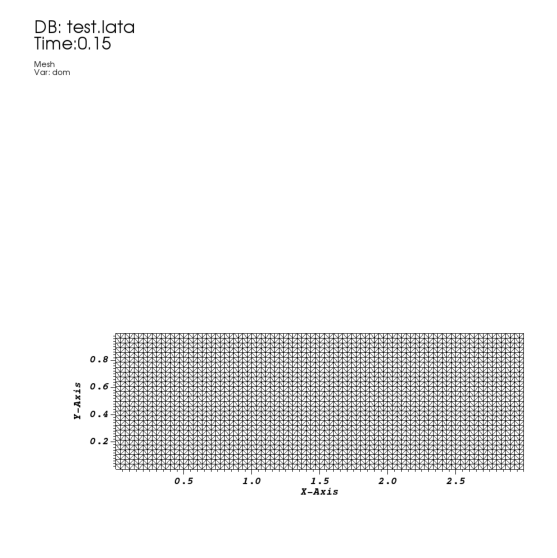

In [2]:
from trustutils import visit 
visit.showMesh("./Explicit_Adams_Bashforth_order_2/test.lata","dom")

### Convergence of the residuals
We plot the following curves to compare the convergence speed for each calculation.

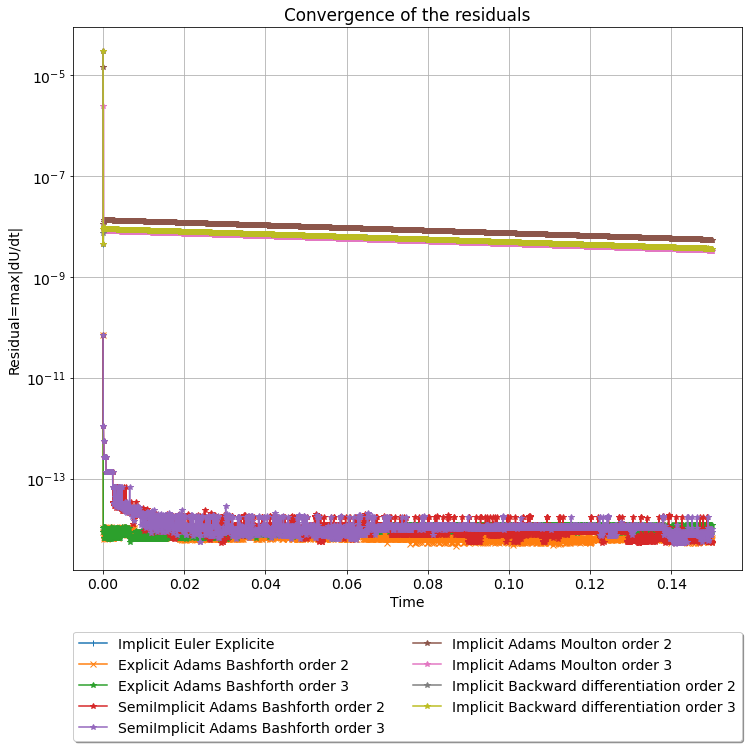

In [3]:
from trustutils import plot

a = plot.Graph("Convergence of the residuals")
a.addResidu("./Implicit_Euler_Implicite/test.dt_ev",label="Implicit Euler Explicite",marker='-|')
a.addResidu("./Explicit_Adams_Bashforth_order_2/test.dt_ev",label="Explicit Adams Bashforth order 2",marker='-x')
a.addResidu("./Explicit_Adams_Bashforth_order_3/test.dt_ev",label="Explicit Adams Bashforth order 3",marker='-*')
a.addResidu("./SemiImplicit_Adams_Bashforth_order_2/test.dt_ev",label="SemiImplicit Adams Bashforth order 2",marker='-*')
a.addResidu("./SemiImplicit_Adams_Bashforth_order_3/test.dt_ev",label="SemiImplicit Adams Bashforth order 3",marker='-*')
a.addResidu("./Implicit_Adams_Moulton_order_2/test.dt_ev",label="Implicit Adams Moulton order 2",marker='-*')
a.addResidu("./Implicit_Adams_Moulton_order_3/test.dt_ev",label="Implicit Adams Moulton order 3",marker='-*')
a.addResidu("./Implicit_Backward_differentiation_order_2/test.dt_ev",label="Implicit Backward differentiation order 2",marker='-*')
a.addResidu("./Implicit_Backward_differentiation_order_3/test.dt_ev",label="Implicit Backward differentiation order 3",marker='-*')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)
a.scale(yscale='log')
a.label("Time","Residual=max|dU/dt|")

## Euler implicit (order 1) solution

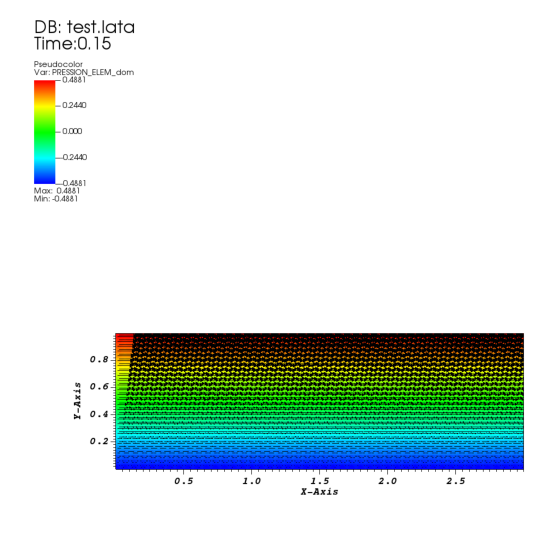

In [4]:
from trustutils import visit 

a = visit.Show("./Implicit_Euler_Implicite/test.lata","Pseudocolor","PRESSION_ELEM_dom",plotmesh=False)
a.addField("./Implicit_Euler_Implicite/test.lata","Vector","VITESSE_ELEM_dom")
a.blackVector()
a.plot()


## Numerical results 
### Maximal Y velocity (0 is the exact solution, so the lower the better)

In [1]:
from trustutils.jupyter import plot 

columns=["Time",'Max(abs(V))']
Table=plot.Table(columns)  

data = plot.loadText("./Implicit_Euler_Implicite/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]],"Implicit Euler (order 1)") 

data = plot.loadText("./Explicit_Adams_Bashforth_order_2/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]],"Explicit Adams Bashforth (order 2)") 

data = plot.loadText("./Explicit_Adams_Bashforth_order_3/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]],"Explicit Adams Bashforth (order 3)") 

data = plot.loadText("./SemiImplicit_Adams_Bashforth_order_2/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]], "Diffusion implicited Adams Bashforth (order 2)" ) 

data = plot.loadText("./SemiImplicit_Adams_Bashforth_order_3/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]], "Diffusion implicited Adams Bashforth (order 3)" ) 

data = plot.loadText("./Implicit_Adams_Moulton_order_2/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]],"Implicit Adams Moulton (order 2)") 

data = plot.loadText("./Implicit_Adams_Moulton_order_3/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]],"Implicit Adams Moulton (order 3)") 

data = plot.loadText("./Implicit_Backward_differentiation_order_2/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]],"Implicit backward differentiation (order 2)" ) 

data = plot.loadText("./Implicit_Backward_differentiation_order_3/test_MAX_V.son",transpose=False)
Table.addLigne([data[-1]],"Implicit backward differentiation (order 3)") 


Table.df


,Time,Max(abs(V))
Implicit Euler (order 1),0.15,6.122567e-10
Explicit Adams Bashforth (order 2),0.15,3.557127e-15
Explicit Adams Bashforth (order 3),0.15,3.556133e-15
Diffusion implicited Adams Bashforth (order 2),0.15,3.574396e-15
Diffusion implicited Adams Bashforth (order 3),0.15,3.559542e-15
Implicit Adams Moulton (order 2),0.15,9.183568e-10
Implicit Adams Moulton (order 3),0.15,5.611981e-10
Implicit backward differentiation (order 2),0.15,6.122307e-10
Implicit backward differentiation (order 3),0.15,6.121495e-10


## Conclusion
The new 3rd order schemes gives better results than the new 2nd order schemes which give better results than the alone implicit Euler scheme (order 1) available in the previous Trio_U versions.